# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marquette
Processing Record 2 of Set 1 | cole harbour
Processing Record 3 of Set 1 | as sulayyil
Processing Record 4 of Set 1 | puerto quijarro
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | nikolayevsk-on-amure
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | jinchang
Processing Record 10 of Set 1 | naze
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | tsuruga
Processing Record 13 of Set 1 | baharly
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kailua-kona
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | colorado
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | longyearbyen
Processing Reco

Processing Record 39 of Set 4 | ad dilam
Processing Record 40 of Set 4 | enewetak
Processing Record 41 of Set 4 | saipan
Processing Record 42 of Set 4 | puerto piray
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | badger
Processing Record 45 of Set 4 | aral
Processing Record 46 of Set 4 | nashtarud
City not found. Skipping...
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | saint-joseph
Processing Record 49 of Set 4 | puerto cabezas
Processing Record 0 of Set 5 | nabire
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | aiquile
Processing Record 3 of Set 5 | staraya stanitsa
Processing Record 4 of Set 5 | zouerate
Processing Record 5 of Set 5 | hawaiian paradise park
Processing Record 6 of Set 5 | coruripe
Processing Record 7 of Set 5 | tasqala
Processing Record 8 of Set 5 | imbituba
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | bubaque
Processing Record 11 of Set 5 | nakhchiva

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ma'an,26.9775,110.7211,281.19,88,100,1.90,CN,1682298275
1,port elizabeth,-33.9180,25.5701,292.09,95,75,1.54,ZA,1682298106
2,hermanus,-34.4187,19.2345,292.48,94,100,3.53,ZA,1682298275
3,ushuaia,-54.8000,-68.3000,280.96,53,20,2.06,AR,1682298276
4,klyuchi,52.2667,79.1667,281.50,48,29,8.05,RU,1682298276


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ma'an,26.9775,110.7211,281.19,88,100,1.90,CN,1682298275
1,port elizabeth,-33.9180,25.5701,292.09,95,75,1.54,ZA,1682298106
2,hermanus,-34.4187,19.2345,292.48,94,100,3.53,ZA,1682298275
3,ushuaia,-54.8000,-68.3000,280.96,53,20,2.06,AR,1682298276
4,klyuchi,52.2667,79.1667,281.50,48,29,8.05,RU,1682298276


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ma'an,26.9775,110.7211,281.19,88,100,1.90,CN,1682298275
4,klyuchi,52.2667,79.1667,281.50,48,29,8.05,RU,1682298276
6,albany,42.6001,-73.9662,282.24,88,99,2.10,US,1682297721
7,tralee,52.2704,-9.7026,280.33,92,81,2.49,IE,1682298276
8,viziru,45.0167,27.7000,282.21,78,60,3.27,RO,1682298276


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto quijarro,-17.7833,-57.7667,296.54,73,17,0.33,BO,1682299116
6,chonchi,-42.6128,-73.8092,279.33,96,1,0.45,CL,1682299116
7,margaret river,-33.9500,115.0667,286.96,64,86,7.66,AU,1682299117
10,port-aux-francais,-49.3500,70.2167,277.34,62,99,14.35,TF,1682299117
13,puerto natales,-51.7236,-72.4875,280.15,96,100,1.30,CL,1682299117


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7886316717944114


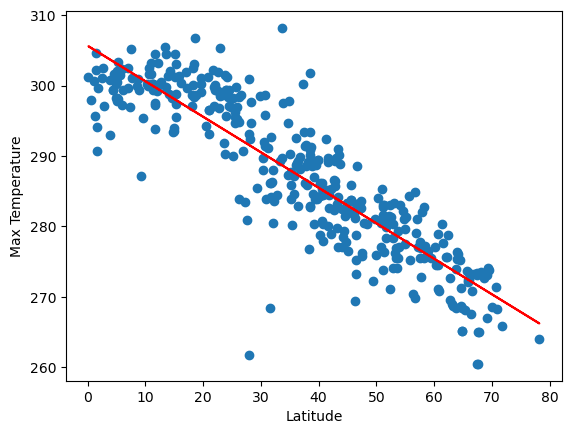

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6098557869261872


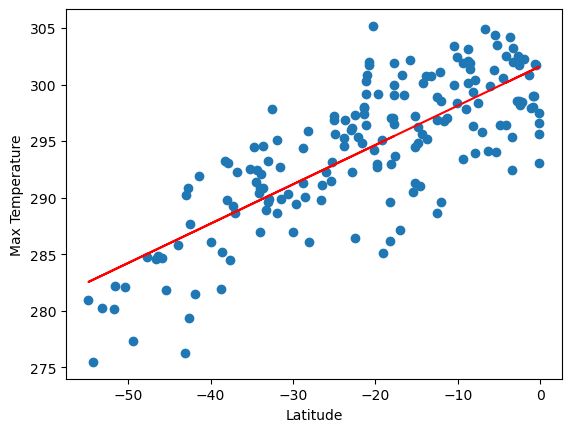

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between latitude and temperature in the northern hemisphere, and a positive one between them in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0033901779339683314


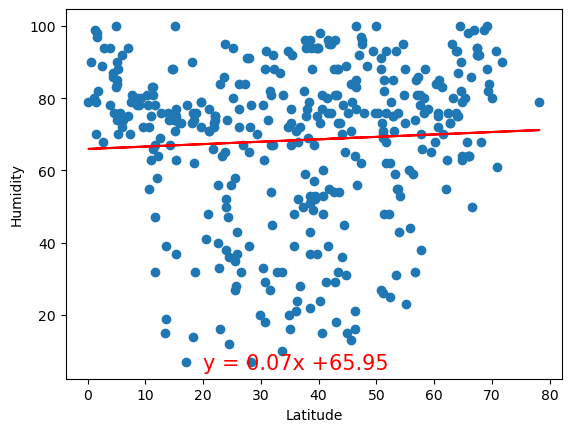

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04627738131773445


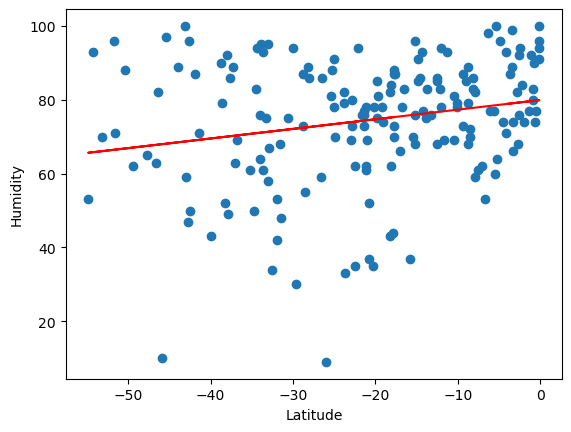

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is not a strong correlation between latitude and humidity in either the northern or southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0029794271687052804


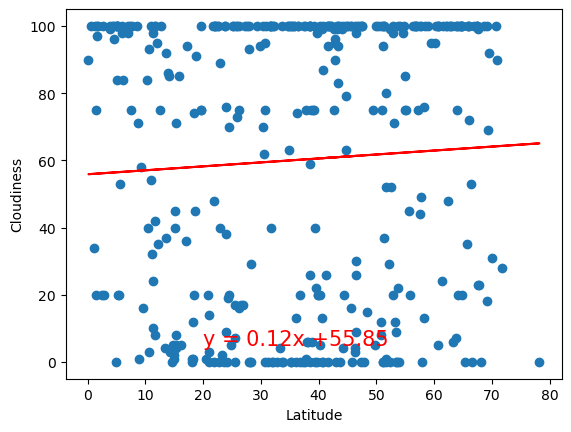

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04260801477107291


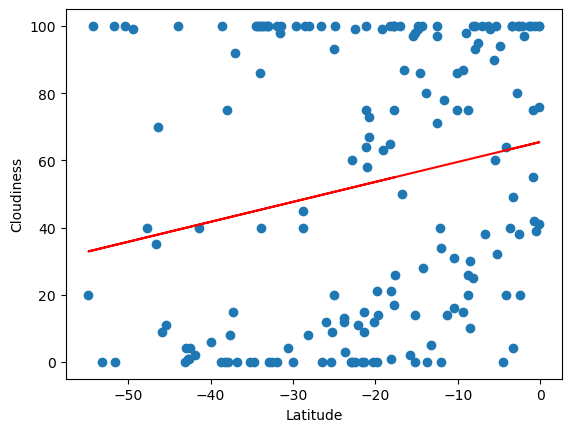

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is not a strong correlation between latitude and cloudiness in the northern hemisphere. There is a slight positive correlation between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015349763466141558


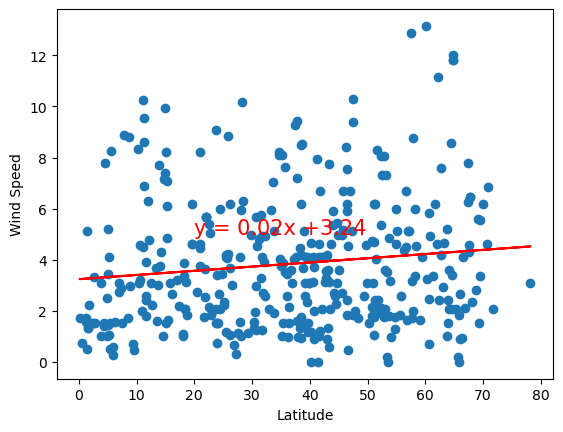

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.03784084891505069


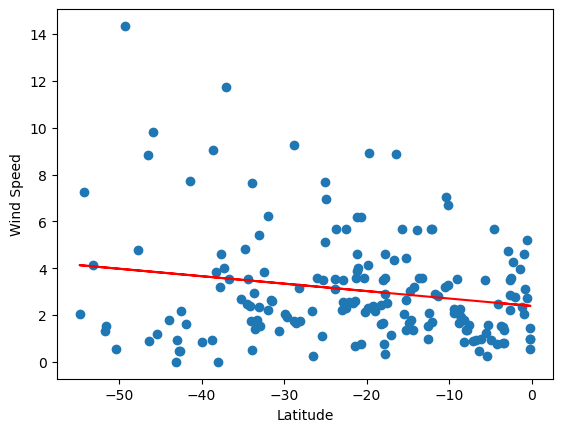

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (20,5), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is not a strong correlation between latitude and wind speed in either the northern or southern hemisphere. 